<a href="https://colab.research.google.com/github/jsromerop/dsi_uoft_bld_software/blob/main/github_api_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

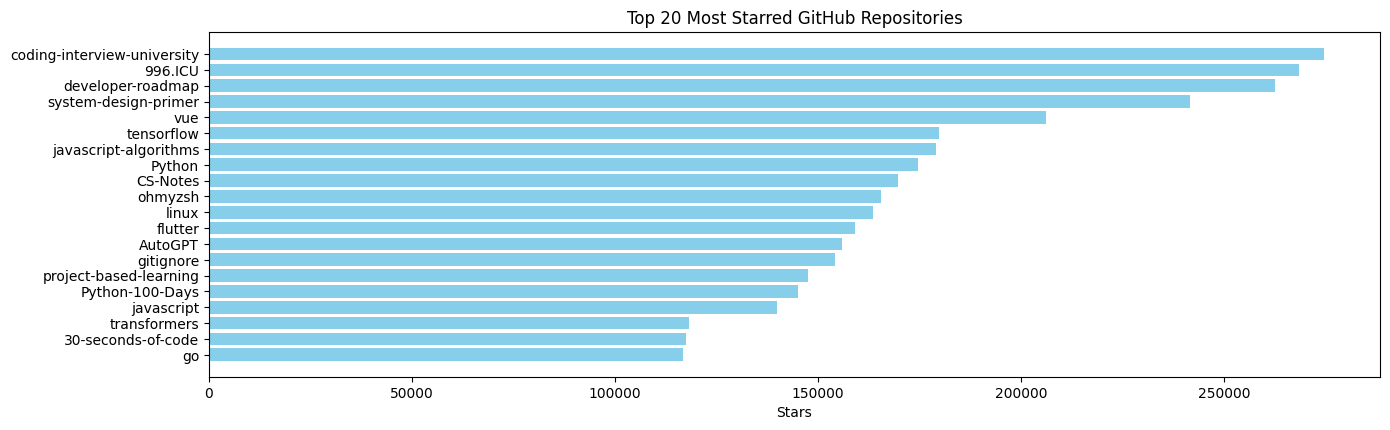

In [3]:
import requests
import json
import matplotlib.pyplot as plt
from google.colab import userdata

# Set up logging
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Get GitHub token
token = userdata.get('ghtokenjesus')
if not token:
    logger.error("GitHub token not found. Please provide a valid token.")
    raise ValueError("GitHub token not found.")

# Set up headers
headers = {"Authorization": "Bearer " + token}

try:
    # Fetch top 20 starred repositories
    n = 20
    repositories_response = requests.get('https://api.github.com/search/repositories?q=stars:>1&sort=stars', headers=headers)
    repositories_response.raise_for_status()  # Check for HTTP errors
    repositories = repositories_response.json()['items'][:n]

    # Sort repositories based on stars (from best to worst)
    repositories.sort(key=lambda x: x.get('stargazers_count', 0), reverse=True)

    # Extracting data for visualization
    repository_names = [repo['name'] for repo in repositories]
    repository_stars = [repo['stargazers_count'] for repo in repositories]

    # Visualization with Matplotlib
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 1, 2)
    plt.barh(repository_names[::-1], repository_stars[::-1], color='skyblue')
    plt.xlabel('Stars')
    plt.title('Top 20 Most Starred GitHub Repositories')
    plt.tight_layout()

    plt.show()

except requests.exceptions.RequestException as e:
    logger.error(f"Error during GitHub API request: {e}")
except KeyError as e:
    logger.error(f"Error parsing GitHub API response: {e}")
except Exception as e:
    logger.error(f"An unexpected error occurred: {e}")